In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_excel('/media/D/musor/reportsd.xls')

In [4]:
df.head(6)


,Номер,Ticket#,Возраст,Название,Дата создания,Время закрытия,Очередь,Состояние,ID клиента,Сервис,...,Источник,Причина отклонения,Оценка,Информационная система,Причина обращения,Имя Фамилия,Отдел/Отделение,Требуется выезд СА (уведомление директору),Текст обращения,TestText2
0,1,20231027100068,9 m,принтер,2023-10-27 10:35:12,NaN,Кызылординский филиал Техподдержка,in progress,KZF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Email,NaN,NaN,NaN,NaN,Күнекей Ерлан,_Отделения,NaN,NaN,NaN
1,2,20231027100066,14 m,картридж,2023-10-27 10:30:11,NaN,Жамбылский филиал Техподдержка,in progress,TF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Email,NaN,NaN,NaN,NaN,Ерасыл Сартай,_Отделения,NaN,NaN,NaN
2,3,20231027100061,17 m,"В кассе отд. Саумалколь начал ""зависать"" скане...",2023-10-27 10:27:54,NaN,Акмолинский филиал Техподдержка,in progress,KSHF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Phone,NaN,NaN,NaN,NaN,Ольга Анналыева,_Отделения,NaN,NaN,NaN
3,4,20231027100059,24 m,Обновление до Win11 ПК видеонаблюдения с кабин...,2023-10-27 10:20:47,2023-10-27 10:21:19,Акмолинский филиал Техподдержка,closed,KSHF,10 ИТ-поддержка филиалов::10R_8 Прочее,...,Phone,NaN,NaN,NaN,NaN,Захар Ровенский,(32) Отдел информационных технологий,NaN,NaN,NaN
4,5,20231027100054,29 m,RE: проблема с нклайер,2023-10-27 10:15:26,NaN,Кызылординский филиал Техподдержка,in progress,KZF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Email,NaN,NaN,NaN,NaN,Нурбол Бегманов,(41) Отдел по работе с проблемными кредитами,NaN,NaN,NaN
5,6,20231027100043,46 m,Инцидент на хосте PF_Alga_188_wall,2023-10-27 09:58:55,2023-10-27 10:36:34,Павлодарский филиал Техподдержка,closed,HQ,10 ИТ-поддержка филиалов::10I_4 Платежные терм...,...,Phone,NaN,NaN,NaN,NaN,Никита Шмидт,(0914) Отдел мониторинга,NaN,NaN,NaN


In [10]:
df['Время закрытия']

0                        NaN
1                        NaN
2                        NaN
3        2023-10-27 10:21:19
4                        NaN
                ...         
13164    2023-01-04 12:24:56
13165    2023-01-06 12:27:58
13166    2023-01-06 12:27:20
13167    2023-01-06 12:26:43
13168    2023-01-06 12:26:08
Name: Время закрытия, Length: 13169, dtype: object

In [8]:
df['Дата создания'] = pd.to_datetime(df['Дата создания'])

In [22]:
current_date = datetime.now()
df['Время закрытия'] = pd.to_datetime(df['Время закрытия'], errors='coerce').fillna(current_date)
df['Время закрытия'] = pd.to_datetime(df['Время закрытия'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['Время закрытия'] = df['Время закрытия'].dt.round('1s')

In [23]:
df['Время закрытия']

0       2023-10-27 11:37:34
1       2023-10-27 11:37:34
2       2023-10-27 11:37:34
3       2023-10-27 10:21:19
4       2023-10-27 11:37:34
                ...        
13164   2023-01-04 12:24:56
13165   2023-01-06 12:27:58
13166   2023-01-06 12:27:20
13167   2023-01-06 12:26:43
13168   2023-01-06 12:26:08
Name: Время закрытия, Length: 13169, dtype: datetime64[ns]

In [24]:
df['Дата создания']

0       2023-10-27 10:35:12
1       2023-10-27 10:30:11
2       2023-10-27 10:27:54
3       2023-10-27 10:20:47
4       2023-10-27 10:15:26
                ...        
13164   2023-01-01 06:05:20
13165   2023-01-01 06:05:18
13166   2023-01-01 06:05:17
13167   2023-01-01 06:05:16
13168   2023-01-01 06:00:15
Name: Дата создания, Length: 13169, dtype: datetime64[ns]

In [27]:
df['time'] = df['Время закрытия'] - df['Дата создания']

In [28]:
df['time']

0       0 days 01:02:22
1       0 days 01:07:23
2       0 days 01:09:40
3       0 days 00:00:32
4       0 days 01:22:08
              ...      
13164   3 days 06:19:36
13165   5 days 06:22:40
13166   5 days 06:22:03
13167   5 days 06:21:27
13168   5 days 06:25:53
Name: time, Length: 13169, dtype: timedelta64[ns]

In [106]:
df['Тип'] == 'Инцидент'

0        False
1        False
2        False
3        False
4        False
         ...  
13164     True
13165     True
13166     True
13167     True
13168     True
Name: Тип, Length: 13169, dtype: bool

In [107]:
mean_time = df[df['Тип'] == 'Инцидент'].groupby('Агент (владелец)')['time'].mean()

In [108]:
mean_time.sort_values()

Агент (владелец)
Алишер Саяков                      0 days 00:52:25
Дмитрий Ермаченко        0 days 05:14:30.659574468
Александр Гурьев         0 days 08:00:51.872093023
Мамбетай Жаутаев         0 days 10:23:42.791855203
Александр Гильдебранд              0 days 11:38:57
Серик Карпанбаев         0 days 17:35:01.222222222
Жанболат Жеңісбек        0 days 20:49:07.067567567
Ярослав Латыпов          0 days 20:55:03.785714285
Азизбек Хамидов          1 days 02:19:33.388349514
Сергей Яснопольский         1 days 03:27:19.437500
Антон Столяров           1 days 04:42:55.678321678
Тимур Пулатов            1 days 06:20:06.066666666
Сергей Бирюков              1 days 07:04:32.150000
Рустам Салкенов          1 days 08:41:46.038461538
Абай Пирназаров                    1 days 09:59:29
Владимир Демин           1 days 11:26:29.716049382
Алинур Жаркимбаев        1 days 11:59:24.428571428
Ринал Чуканов            1 days 12:54:14.248447204
Адлан Закирьянов            1 days 13:15:25.625000
Вадим Васильев

In [109]:
df1 = pd.DataFrame(mean_time)

In [110]:
df1['time'] = df1['time'].apply(lambda x: x.total_seconds() / 3600 / 24)

In [111]:
df1 = df1.sort_values(by='time')

In [112]:
df1['time']

Агент (владелец)
Алишер Саяков              0.036400
Дмитрий Ермаченко          0.218410
Александр Гурьев           0.333934
Мамбетай Жаутаев           0.433134
Александр Гильдебранд      0.485382
Серик Карпанбаев           0.732653
Жанболат Жеңісбек          0.867443
Ярослав Латыпов            0.871572
Азизбек Хамидов            1.096914
Сергей Яснопольский        1.143975
Антон Столяров             1.196478
Тимур Пулатов              1.263959
Сергей Бирюков             1.294817
Рустам Салкенов            1.362338
Абай Пирназаров            1.416308
Владимир Демин             1.476733
Алинур Жаркимбаев          1.499588
Ринал Чуканов              1.537665
Адлан Закирьянов           1.552380
Вадим Васильев             1.869104
Руслан Исмаилов            1.914448
Айдын Джакашев             2.006414
Рустам Артыков             2.058189
Захар Ровенский            2.136447
Антон Новиков              2.230110
Ислам Бекқұл               2.442678
Келімбет Қадырбек          2.516666
Байел Кенен

<function matplotlib.pyplot.show(close=None, block=None)>

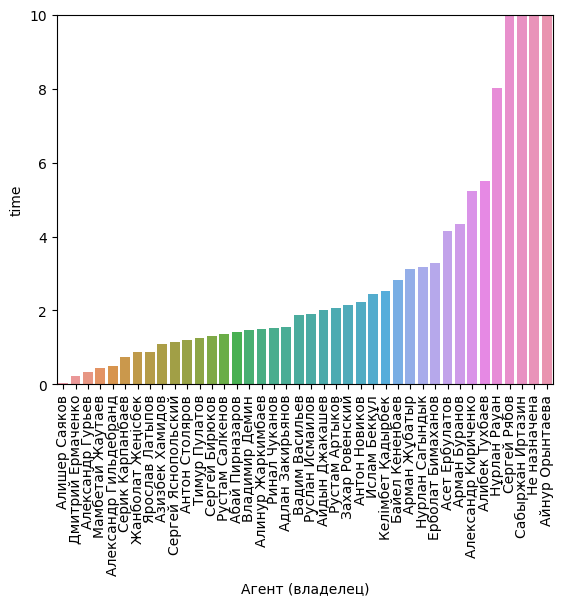

In [113]:
sns.barplot(x=df1.index, y=df1['time'])
#plt.ylabel('Часы работы')
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.savefig('/media/D/musor/graphik.png', bbox_inches='tight')
plt.show